# Chiller plant decision tree analysis

The purpose of this notebook is to analyze the features and data with decision trees.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
%matplotlib inline

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('../dss_Alb h 2017-09.csv')


In [3]:
df.dropna()

,timestamp,CH3LoadDisp,CH3PctLoad,CH4LoadDisp,CH4PctLoad,CH5LoadDisp,CH5PctLoad,CHkW%,CHTON%,PercentAnnualSavings,...,CH5SURGE,LOOPREQ,RUNCHLR3,RUNCHLR4,RUNCHLR5,CH3SURGECNT,CH4SURGECNT,CH5SURGECNT,CLGMODE,StationSTG
60,2017-09-03T12:00:00.000Z,0.000000,0.00000,87.101169,87.101168,0.982292,0.982292,71.551070,86.750559,0.000124,...,0.0,1.0,0.000000,1.000000,0.166667,13.0,0.0,0.0,0.0,1.166667
61,2017-09-03T13:00:00.000Z,0.000000,0.00000,61.628025,61.649601,32.699242,32.699242,28.800355,46.600451,0.000184,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
62,2017-09-03T14:00:00.000Z,0.000000,0.00000,65.271903,65.271902,34.757415,34.667396,31.222250,49.421877,0.000195,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
63,2017-09-03T15:00:00.000Z,0.000000,0.00000,62.073736,60.817505,35.873339,35.490721,31.827724,50.010946,0.000182,...,0.0,1.0,0.166667,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
66,2017-09-03T18:00:00.000Z,0.000000,0.00000,66.073464,66.073463,37.944247,37.944247,34.189070,52.350163,0.000190,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
67,2017-09-03T19:00:00.000Z,0.000000,0.00000,64.536953,64.555182,36.308257,36.305479,32.816663,50.486619,0.000187,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
68,2017-09-03T20:00:00.000Z,0.000000,0.00000,60.918676,60.918676,33.823301,33.823301,30.818600,47.683522,0.000179,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
69,2017-09-03T21:00:00.000Z,0.000000,0.00000,57.567634,57.580631,32.202592,32.206610,29.244369,44.708515,0.000156,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
70,2017-09-03T22:00:00.000Z,0.000000,0.00000,40.959836,41.008944,42.549615,42.540327,31.184866,50.812883,0.000141,...,0.0,1.0,0.000000,0.666667,1.000000,13.0,0.0,0.0,0.0,1.583333
71,2017-09-03T23:00:00.000Z,0.000000,0.00000,0.000000,0.000000,78.306298,77.869101,50.595238,78.069033,0.000098,...,0.0,1.0,0.000000,0.000000,1.000000,13.0,0.0,0.0,0.0,1.000000


In [4]:
key = pd.read_excel('../Ethicon Alb Points List.xlsx')

In [5]:
key_bas = key.loc[key['PointType'].str.contains("BAS")==True,'DataPointName']
vals = key_bas.values.T.tolist()
vals.append('kW/Ton')
print(vals)

['CDWVLV', 'CDWVLV2', 'CHkW', 'CHWDP2', 'CHWFLO', 'CHWRT', 'CHWRT2', 'CHWRT3', 'CHWST', 'CHWST2', 'CHWST3', 'CHWV10', 'CHWV11', 'CHWV12', 'CHWV13', 'CHWV14', 'CHWV15', 'CHWV16', 'CHWV17', 'CHWV18', 'CHWV19', 'CHWV20', 'CHWV21', 'CHWV22', 'CHWV23', 'CHWV24', 'CHWV25', 'CHWV26', 'CHWV27', 'CHWV3', 'CHWV4', 'CHWV5', 'CHWV6', 'CHWV7', 'CHWV9', 'CLGMODE', 'CommunicationFailure', 'CommunicationFailure_COV', 'CTTR_ALARM', 'HX1CDWRT', 'HX1CDWST', 'HX1CDWVLV', 'HX1CHWRT', 'HX1CHWST', 'HX1CHWVLV', 'LOOPREQ', 'MaxCHDPLift', 'MaxCHDTLift', 'MinCHDPLift', 'MinCHDTLift', 'OAH', 'OAT', 'OAWB', 'PCHWP3Failed', 'PCHWP3HZ', 'PCHWP3kW', 'PCHWP3S', 'PCHWP3SPD', 'PCHWP3SS', 'PCHWP4Failed', 'PCHWP4HZ', 'PCHWP4kW', 'PCHWP4S', 'PCHWP4SPD', 'PCHWP4SS', 'PCHWP5Failed', 'PCHWP5HZ', 'PCHWP5kW', 'PCHWP5S', 'PCHWP5SPD', 'PCHWP5SS', 'SCHWP3Failed', 'SCHWP3HZ', 'SCHWP3kW', 'SCHWP3S', 'SCHWP3SPD', 'SCHWP3SS', 'SCHWP4Failed', 'SCHWP4HZ', 'SCHWP4kW', 'SCHWP4S', 'SCHWP4SPD', 'SCHWP4SS', 'SCHWP5Failed', 'SCHWP5HZ', 'SCHWP

In [6]:
for x in vals:
    if x not in df.columns:
        print(x)
        vals.remove(x)

CommunicationFailure_COV


In [7]:
bas = df[vals].dropna()
bas.shape

(1432, 89)

In [8]:
bas.describe()

,CDWVLV,CDWVLV2,CHkW,CHWDP2,CHWFLO,CHWRT,CHWRT2,CHWRT3,CHWST,CHWST2,...,SCHWP4S,SCHWP4SPD,SCHWP4SS,SCHWP5Failed,SCHWP5HZ,SCHWP5kW,SCHWP5S,SCHWP5SPD,SCHWP5SS,kW/Ton
count,1432.0,1432.0,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,...,1432.0,1432.000000,1432.0,1432.0,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000
mean,1.0,1.0,98.902642,8.492637,589.291727,55.917817,53.298610,58.088680,42.227512,42.951630,...,1.0,90.923403,1.0,0.0,52.033752,3.494215,0.945473,86.721652,0.945473,0.472991
std,0.0,0.0,33.315313,2.737801,94.775350,1.392454,1.378229,1.772257,0.951318,0.937767,...,0.0,10.504507,0.0,0.0,13.656170,1.243972,0.224243,22.759971,0.224243,0.077126
min,1.0,1.0,25.916667,0.246445,114.786458,53.570312,50.500000,55.023438,39.171875,40.531250,...,1.0,58.860875,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.253498
25%,1.0,1.0,76.166667,7.367799,537.046875,55.139323,52.757161,57.333333,41.793620,42.500000,...,1.0,84.364245,1.0,0.0,50.583333,2.858333,1.000000,84.305216,1.000000,0.430250
50%,1.0,1.0,100.125000,9.186853,590.875000,55.923177,53.218750,58.065104,41.970052,42.562500,...,1.0,95.027395,1.0,0.0,56.341666,3.900000,1.000000,93.902402,1.000000,0.484020
75%,1.0,1.0,121.333333,10.094532,629.843750,56.541667,53.875651,58.503255,42.391276,42.875000,...,1.0,99.999603,1.0,0.0,60.000000,4.491667,1.000000,99.999603,1.000000,0.524161
max,1.0,1.0,226.916667,12.409439,870.833333,73.338542,68.760417,86.744792,45.278646,46.125000,...,1.0,99.999603,1.0,0.0,60.000000,5.275000,1.000000,99.999603,1.000000,0.709987


In [9]:
n = len(bas.columns)

In [10]:
X = bas.values[:, 0:(n-2)]
Y = bas.values[:, (n-1)]

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25,
                                               random_state=3393)

In [12]:
model = DecisionTreeRegressor(
    random_state=3393, max_depth=5, 
    min_samples_leaf=7)

In [13]:
model.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=7,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3393, splitter='best')

In [14]:
y1 = model.predict(xtest)

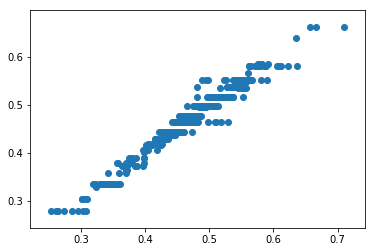

In [15]:
plt.figure()
plt.scatter(ytest, y1)

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y1))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y1))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(ytest, y1)))

Mean Absolute Error: 0.010721883198043652
Mean Squared Error: 0.00022681073084457752
Root Mean Squared Error: 0.015060236745967093


In [17]:
fanalysis = ExtraTreesRegressor(max_depth=3, 
                                random_state=3393)

In [18]:
fanalysis.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=3393, verbose=0, warm_start=False)

In [19]:
print(fanalysis.feature_importances_)

[0.         0.         0.07088682 0.         0.         0.
 0.         0.00051398 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00034673 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.17919713 0.1957956  0.21427063
 0.25704388 0.00107865 0.         0.05439387 0.         0.00680191
 0.         0.00649478 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00038209 0.         0.         0.
 0.         0.         0.00470717 0.         0.         0.00659095
 0.         0.         0.         0.         0.         0.
 0.00116332 0.         0.00033249]


In [20]:
feats = fanalysis.feature_importances_
range(len(feats))

range(0, 87)

In [21]:
fanalysis.decision_path(X)

(<1432x150 sparse matrix of type '<class 'numpy.int64'>'
 	with 57280 stored elements in Compressed Sparse Row format>,
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150], dtype=int32))

In [22]:
fanalysis.score(X, Y)

0.9408373537949389

In [23]:
def feature_importance(X, Y, mx_depth):
    model = ExtraTreesRegressor(max_depth=mx_depth,
                                random_state=3393)
    model.fit(X, Y)
    features = model.feature_importances_
    important_features = []
    important_features_values = []
    for i in range(len(features)):
        if features[i] != 0.0:
            important_features.append(vals[i])
            important_features_values.append(features[i])
    return important_features, important_features_values

In [24]:
feature_importance(X, Y, 3)

(['CHkW',
  'CHWRT3',
  'CHWV9',
  'MaxCHDPLift',
  'MaxCHDTLift',
  'MinCHDPLift',
  'MinCHDTLift',
  'OAH',
  'OAWB',
  'PCHWP3HZ',
  'PCHWP3S',
  'PCHWP5SPD',
  'SCHWP3SPD',
  'SCHWP4HZ',
  'SCHWP5kW',
  'SCHWP5SPD'],
 [0.07088681958309809,
  0.0005139840119267785,
  0.0003467313679305708,
  0.17919713483828112,
  0.19579559602207325,
  0.21427062944970512,
  0.2570438793193609,
  0.0010786539543429145,
  0.054393870759148165,
  0.0068019094419545486,
  0.006494783068928837,
  0.0003820875450259764,
  0.004707165239125402,
  0.0065909494107647655,
  0.0011633171930004404,
  0.0003324887953331082])

In [25]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [26]:
clf = GradientBoostingRegressor(**params)

In [27]:
clf.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [28]:
mse = mean_squared_error(ytest, clf.predict(xtest))

In [29]:
print('MSE: %.4f' % mse)

MSE: 0.0001


In [30]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

In [31]:
for i, ypred in enumerate(clf.staged_predict(xtest)):
    test_score[i] = clf.loss_(ytest, ypred)

Text(0,0.5,'Deviance')

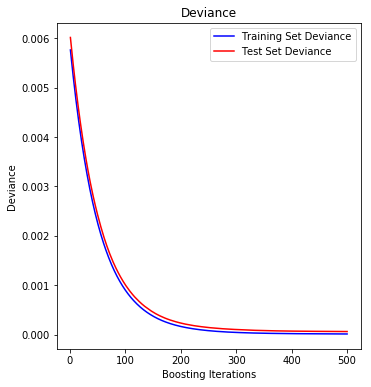

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

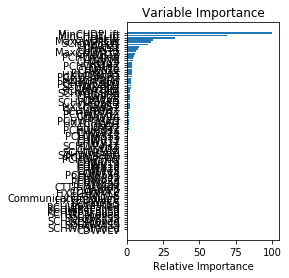

In [33]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, bas.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [34]:
x = bas.columns[sorted_idx]

In [35]:
print(x)

Index(['CDWVLV', 'SCHWP5Failed', 'SCHWP4SS', 'SCHWP4S', 'SCHWP4Failed',
       'SCHWP3SS', 'SCHWP3S', 'SCHWP3Failed', 'PCHWP5Failed', 'PCHWP4Failed',
       'PCHWP3Failed', 'LOOPREQ', 'SCHWP5S', 'HX1CDWVLV',
       'CommunicationFailure', 'CLGMODE', 'HX1CHWVLV', 'CDWVLV2', 'CHWV3',
       'CTTR_ALARM', 'CHWV20', 'PCHWP5S', 'CHWV23', 'PCHWP4S', 'PCHWP5SS',
       'CHWV4', 'CHWV15', 'CHWV24', 'CHWV10', 'CHWV19', 'CHWV11', 'PCHWP5kW',
       'PCHWP4SS', 'SCHWP4SPD', 'SCHWP5HZ', 'CHWV18', 'OAT', 'SCHWP4HZ',
       'CHWV21', 'CHWV12', 'CHWRT3', 'PCHWP3SS', 'CHWV17', 'CHWV25',
       'PCHWP3HZ', 'CHWV27', 'OAH', 'HX1CHWST', 'PCHWP3SPD', 'CHWV6', 'CHWV14',
       'PCHWP5HZ', 'SCHWP3HZ', 'CHWRT', 'HX1CDWST', 'CHWV13', 'SCHWP3SPD',
       'CHWV5', 'CHWV22', 'CHWV26', 'SCHWP5SPD', 'SCHWP3kW', 'CHWDP2',
       'SCHWP4kW', 'PCHWP5SPD', 'PCHWP3kW', 'HX1CHWRT', 'PCHWP4SPD',
       'HX1CDWRT', 'PCHWP3S', 'CHWST2', 'OAWB', 'PCHWP4HZ', 'CHWV7', 'CHWV16',
       'CHWV9', 'PCHWP4kW', 'CHWRT2', 'MaxCHDTLi

In [36]:
print(sorted_idx)

[ 0 82 81 79 76 75 73 70 64 58 52 44 85 40 36 35 43  1 29 37 21 67 24 61
 69 30 16 25 11 20 12 66 63 80 83 19 50 77 22 13  7 57 18 26 53 28 49 42
 56 32 15 65 71  5 39 14 74 31 23 27 86 72  3 78 68 54 41 62 38 55  9 51
 59 33 17 34 60  6 46 10  8  4 84 45  2 48 47]


In [41]:
print(feature_importance[sorted_idx])
imp = feature_importance[sorted_idx]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.90666984e-03 1.44958361e-02
 3.51165883e-02 4.72980309e-02 6.17226491e-02 7.63129628e-02
 1.03460276e-01 1.18446170e-01 1.46926172e-01 1.60366479e-01
 2.24629034e-01 2.29295199e-01 3.69123732e-01 3.88642306e-01
 3.94581167e-01 4.93775413e-01 6.07881506e-01 6.91478836e-01
 7.02017065e-01 7.75171491e-01 7.98198692e-01 8.07056738e-01
 8.41192020e-01 9.46883127e-01 9.56081709e-01 1.02974598e+00
 1.10815718e+00 1.20578533e+00 1.28616635e+00 1.31765590e+00
 1.38041884e+00 1.42752278e+00 1.45646956e+00 1.50762718e+00
 1.70801896e+00 1.84149058e+00 1.85493505e+00 1.88106468e+00
 1.98141349e+00 2.02549334e+00 2.03735322e+00 2.05488462e+00
 2.17423456e+00 2.28760750e+00 2.57411833e+00 2.78662996e+00
 2.86693431e+00 2.882515

In [42]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [43]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV
1,0.000000,SCHWP5Failed
2,0.000000,SCHWP4SS
3,0.000000,SCHWP4S
4,0.000000,SCHWP4Failed
5,0.000000,SCHWP3SS
6,0.000000,SCHWP3S
7,0.000000,SCHWP3Failed
8,0.000000,PCHWP5Failed
9,0.000000,PCHWP4Failed
